# Optimización del Activo
## Import de paquetes y funciones

In [1]:
library("readxl")
library("lubridate")
library('tidyr')
library('ggplot2')
library('YieldCurve')
library('dplyr')

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'YieldCurve' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:xts':

    first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:

In [2]:
search()

[1] ".GlobalEnv"         "package:dplyr"      "package:YieldCurve"
 [4] "package:xts"        "package:zoo"        "package:ggplot2"   
 [7] "package:tidyr"      "package:lubridate"  "package:readxl"    
[10] "jupyter:irkernel"   "jupyter:irkernel"   "package:stats"     
[13] "package:graphics"   "package:grDevices"  "package:utils"     
[16] "package:datasets"   "package:methods"    "Autoloads"         
[19] "package:base"

In [3]:
source("helpers.R")

### Simulación de personas

In [4]:
pathmort <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/Mortality.xlsx'

In [5]:
mortality <- read_excel(pathmort, sheet=1,skip=2, col_names=c('age','i_m','d_m','q_m','e_m','age_2','i_f','d_f','q_f','e_f'))
mortality <- mortality[,c(1,4,9)]
mortality <- data.frame(lapply(mortality, function(x) as.numeric(as.character(x))))
head(mortality)

,age,q_m,q_f
,<dbl>,<dbl>,<dbl>
1,50,0.003353,0.001880
2,51,0.003641,0.002042
3,52,0.003956,0.002219
4,53,0.004301,0.002412
5,54,0.004681,0.002625
6,55,0.005050,0.002833


In [38]:
simulaciones <- function(future=60){
    t_ages<- list()
    for (i in 50:89){
        m=7500
        f=7500
        t_l <- c(15000)
        k <- i-1
        for (j in 1:future){
            s <- k+j
            if (s<110){
               p_m <- mortality[mortality$age==s,2]
               p_f <- mortality[mortality$age==s,3]
            }
            else {
               p_m <- 1
               p_f <- 1
            }
            m <- sum(rbinom(m, size=1, prob= (1-p_m)))
            f <- sum(rbinom(f, size=1, prob= (1-p_f)))
            t_l <- c(t_l, (m+f) )
        }
    t_ages<- c(t_ages, t_l)
    }
    t_ages <- as.data.frame(matrix(t_ages, byrow=TRUE, nrow= length(c(50:89)) ))
    t_ages <- data.frame(lapply(t_ages, function(x) as.numeric(as.character(x))))
    t_sum <- colSums(t_ages)
return(t_sum) 
}

In [23]:
mortality[mortality$age==51,2]

[1] 0.003641

In [39]:
future <- 30
sims <- data.frame(matrix(NA, nrow = 1000, ncol = (future+1)))
for (i in 1:1000){
    sims[i,] <- simulaciones(future)
}


In [40]:
sims

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6e+05,583656,566680,548964,530915,512597,493894,474947,455990,436708,...,228000,213406,199373,185737,172633,159779,147440,135248,123804,112810
6e+05,583664,566734,549299,531424,513162,494365,475349,456091,436898,...,228122,213550,199456,185907,172522,159830,147355,135323,123820,112814
6e+05,583829,566945,549234,531058,512716,493941,474953,455312,436267,...,227943,213285,199241,185779,172910,160110,147695,135871,124316,113171
6e+05,583726,566924,549303,531231,512730,493955,474648,455380,436024,...,228097,213559,199544,185868,172730,159689,147471,135454,123774,112592
6e+05,583794,566854,549166,531206,512760,494106,475218,456113,436858,...,228412,213876,199888,186192,172947,159961,147483,135651,124207,112928
6e+05,583761,566678,549167,531082,512697,493904,474781,455759,436455,...,228414,213694,199652,185940,172670,159762,147429,135374,123968,112955
6e+05,583717,566684,549086,531014,512460,493555,474478,455264,436145,...,228011,213460,199342,185665,172364,159424,147083,134998,123725,112632
6e+05,583434,566508,549068,530946,512551,493693,474653,455396,436103,...,228444,214050,199977,186231,172899,160041,147551,135563,123882,112748
6e+05,583987,567037,549456,530985,512656,493989,474644,455234,435976,...,228371,213761,199636,186076,172794,160005,147627,135732,124149,113068


In [41]:
write.csv(sims,'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/proyection.csv',row.names=F)

In [42]:
# install.packages('data.table')
library('data.table')

In [43]:
sims$id <- seq(1, 1000, 1)

In [44]:
long_sims <- melt(data= sims,id.vars='id', variable.name="period_f", value.name= "alive")

Warning message in melt(data = sims, id.vars = "id", variable.name = "period_f", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(sims). In the next version, this warning will become an error."

In [45]:
head(long_sims)

,id,period_f,alive
,<dbl>,<fct>,<dbl>
1,1,X1,6e+05
2,2,X1,6e+05
3,3,X1,6e+05
4,4,X1,6e+05
5,5,X1,6e+05
6,6,X1,6e+05


In [46]:
long_sims$period_f <- as.numeric(substring(as.character(long_sims$period_f), 2))

In [34]:
head(long_sims)

,id,period_f,alive
,<dbl>,<dbl>,<dbl>
1,1,1,6e+05
2,2,1,6e+05
3,3,1,6e+05
4,4,1,6e+05
5,5,1,6e+05
6,6,1,6e+05


In [47]:
long_sims$flow <- long_sims$alive*0.000018
c_l_sims <- long_sims %>%
            group_by(period_f) %>%
            summarise(alive = mean(alive), flow = mean(flow))


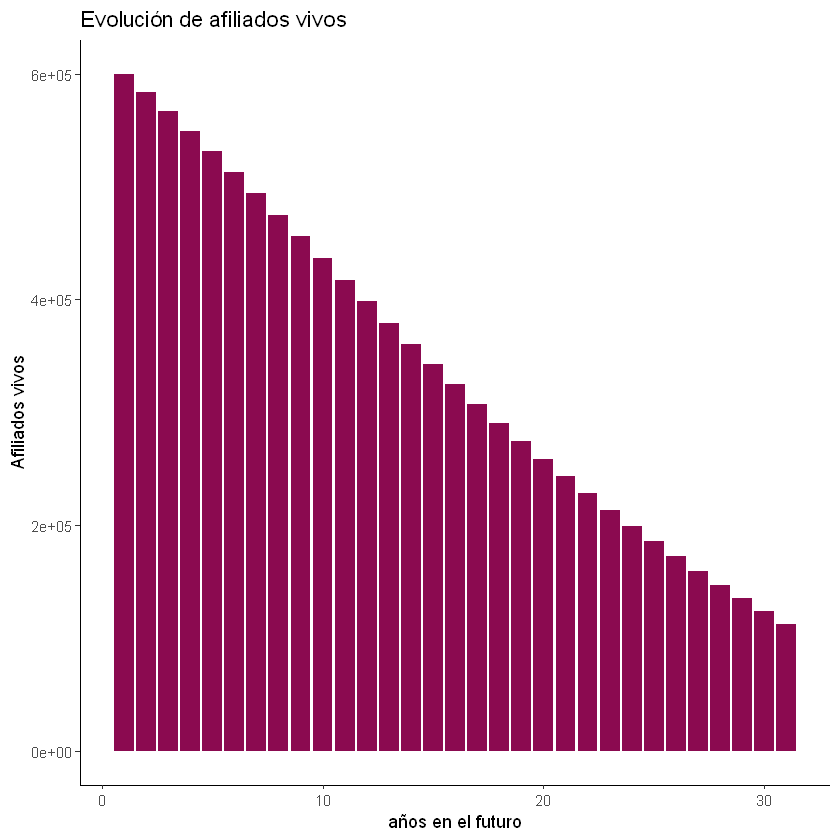

In [48]:
ggplot(c_l_sims,aes(period_f,alive))+  geom_col( fill='deeppink4') + labs(x="años en el futuro", y='Afiliados vivos',title='Evolución de afiliados vivos') +theme_classic()

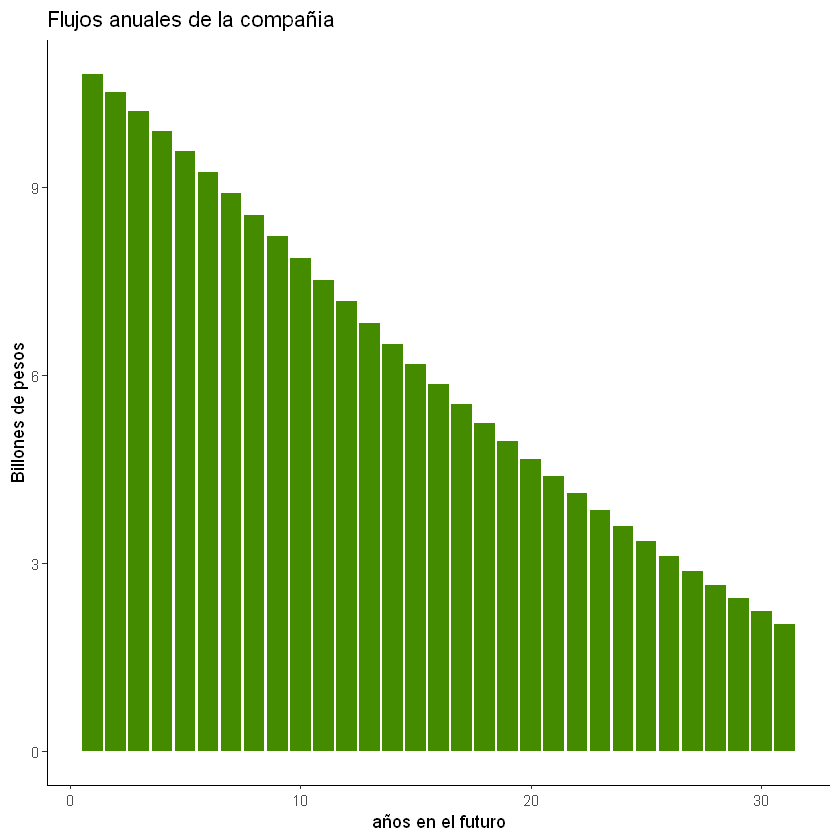

In [49]:

ggplot(c_l_sims,aes(period_f,flow))+ geom_col(fill='chartreuse4') + labs(x="años en el futuro", y='Billones de pesos',title='Flujos anuales de la compañia') +theme_classic()

In [51]:
!conda install jupyterthemes

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: !conda install
           ^


In [49]:
head(long_sims)

,id,period_f,alive,flow
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,6e+05,10.8
2,2,1,6e+05,10.8
3,3,1,6e+05,10.8
4,4,1,6e+05,10.8
5,5,1,6e+05,10.8
6,6,1,6e+05,10.8


## Import de bases de datos de los indices
En esta sección se importan todos los datos de las tasas de interés de los bonos y activos requeridos.   
Adicionalmente, se encuentra la estimación de Nelson Sieguel para descomponer el comportamiento de las tasas.

In [2]:
path <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/data.xlsx'

### Empezamos con los bonos TES en pesos.

In [3]:
tes_cop <- read_excel(path, sheet=1,skip=7, col_names=c('Date','6m','1y','3y','5y','10y','15y'))

In [4]:
tes_cop <- tes_cop[tes_cop$Date >= "2012-04-26",]
tes_cop <- as.data.frame(tes_cop)
rownames(tes_cop) <- tes_cop$Date
tes_cop <- tes_cop[,-c(1)]
tes_cop <- sapply(tes_cop, as.numeric)



In [5]:
tes_maturity <- c(0.5,1,3,5,10,15)
tes_cop_ns <- Nelson.Siegel( rate=tes_cop,	maturity=tes_maturity)


### TES en UVR   
Notese que en este caso se importan directamente los resultados de Nelson Sieguel

In [6]:
tes_uvr_ns <- read_excel(path, sheet='TES UVR Betas',skip=1, col_names=c('Date','beta_0','beta_1','beta_2','lambda'))
tes_uvr_ns <- as.data.frame(tes_uvr_ns)
rownames(tes_uvr_ns) <- tes_uvr_ns$Date
tes_uvr_ns <- tes_uvr_ns[,-c(1)]
head(tes_uvr_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2022-04-08,0.09647801,-0.03119406,0.04511467,3.7
2022-04-07,0.09405698,-0.02969244,0.04226096,3.7
2022-04-06,0.09469592,-0.02990299,0.04248866,3.7
2022-04-05,0.09408631,-0.02883965,0.04186647,3.7
2022-04-04,0.09664698,-0.03390216,0.04312384,3.7
2022-04-01,0.09685086,-0.03217370,0.04468412,3.7


### Corporativo a EEUU

In [30]:
corp_usa <- read_excel(path, sheet='Corporativo A EEUU',skip=8, col_names=c('Date','3m','6m','1y','3y','5y','10y','15y'))

corp_usa <- as.data.frame(corp_usa)
rownames(corp_usa) <- corp_usa$Date
corp_usa <- corp_usa[,-c(1)]
head(corp_usa)

,3m,6m,1y,3y,5y,10y,15y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-13,1.1404,1.2181,1.5046,2.5661,3.4811,4.7076,5.3309
2009-10-14,1.1381,1.2208,1.5196,2.6013,3.5293,4.7843,5.4388
2009-10-15,1.1055,1.1932,1.5041,2.6295,3.5733,4.8308,5.4545
2009-10-16,1.2114,1.2897,1.5619,2.6139,3.5447,4.7820,5.4008
2009-10-19,1.1778,1.2627,1.5420,2.5997,3.5283,4.7502,5.3610
2009-10-20,1.1593,1.2421,1.5096,2.5454,3.4739,4.7214,5.3203


In [31]:
corp_usa_maturity <- c(3/12,0.5,1,3,5,10,15)
corp_usa_ns <- Nelson.Siegel( rate=corp_usa, maturity=corp_usa_maturity)
head(corp_usa_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-13,6.461855,-5.425669,-4.169706,0.5517879
2009-10-14,6.731600,-5.748756,-3.643443,0.4781896
2009-10-15,6.607364,-5.625489,-4.118086,0.5517879
2009-10-16,6.550958,-5.437508,-4.269783,0.5517879
2009-10-19,6.495381,-5.421099,-4.152560,0.5517879
2009-10-20,6.476177,-5.408359,-4.283447,0.5517879


### ETF's de seguimiento de la economía colombiana (COLCAP) y estadounidense (SPX)

In [32]:
index <- read_excel(path, sheet='Indices Accionarios',skip=7, col_names=c('Date','colcap','spx'))
index <- as.data.frame(index)
rownames(index) <- index$Date
index <- index[,-c(1)]
head(index)

,colcap,spx
,<dbl>,<dbl>
2009-10-13,1303.03,1073.19
2009-10-14,1294.39,1092.02
2009-10-15,1294.11,1096.56
2009-10-16,1301.69,1087.68
2009-10-19,1330.80,1097.91
2009-10-20,1315.97,1091.06


### Indice de Precios al consumidor

In [33]:
ipc <- read_excel(path, sheet='IPC',skip=1, col_names=c('Date','ipc'))
ipc <- as.data.frame(ipc)

head(ipc)

,Date,ipc
,<dttm>,<dbl>
1,1954-07-31,0.02632
2,1954-08-31,0.02612
3,1954-09-30,0.02576
4,1954-10-31,0.02585
5,1954-11-30,0.02591
6,1954-12-31,0.02605


### Tasa de cambio

In [34]:
trm <- read_excel(path, sheet='TRM',skip=1, col_names=c('Date','trm'))
trm <- as.data.frame(trm)
head(trm)

,Date,trm
,<dttm>,<dbl>
1,1991-11-27,693.32
2,1991-11-28,693.99
3,1991-11-29,694.70
4,1991-11-30,694.70
5,1991-12-01,643.42
6,1991-12-02,643.42


# Simulaciones de proyección
En esta sección se estiman las 1000 simulaciones para cada uno de los productos financieros. En el caso de los bonos TES cop, TES UVR y corp EEUU se realiza el análisis de componentes principales.

## Set up 

In [15]:
librerias <- c("forecast","xts","rugarch","timeSeries","ggplot2","astsa","scales","lubridate","reshape2","quantmod","xtable","tseries")

In [16]:
library('stats')

In [17]:
if(length(setdiff(librerias, rownames(installed.packages()))) > 0){
  install.packages(setdiff(librerias, rownames(installed.packages())))}
invisible(sapply(librerias, require, character.only = TRUE,quietly = TRUE))

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'rugarch' was built under R version 3.6.3"
Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma

Warning message:
"package 'timeSeries' was built under R version 3.6.3"Warning message:
"package 'timeDate' was built under R version 3.6.2"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas

Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'xtable' was buil

In [147]:
future <- 260 #52 semanas y 5 dìas a la semana para evaluar a un año
simulations <- 1000

## TES Pesos
Lo primero es que obtenemos el cambio en los betas y el lambda de NSiegel:

In [17]:
i_tes_cop <- tes_cop_ns[-nrow(tes_cop_ns),]
f_tes_cop <- tes_cop_ns[-1,]
delta_tes_cop_ns <- f_tes_cop - i_tes_cop

In [18]:
head(delta_tes_cop_ns)

beta_0,beta_1,beta_2,lambda
-0.06977175,0.02571902,-0.106241637,0.02218765
-0.01312430,0.01856500,0.029002789,0.00000000
-0.04168666,0.09245968,-0.002141761,0.00000000
-0.09177265,0.10452687,0.019206748,0.00000000
-0.06661783,0.08733963,-0.001957500,0.01320032
0.04701532,-0.02721950,-0.017491214,-0.01320032


Con la metodologìa de PCA reducimos la dimensionalidad:

In [19]:
pca_tes_cop <- prcomp(delta_tes_cop_ns, scale=TRUE)
summary(pca_tes_cop)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6131 1.1051 0.38098 0.17741
Proportion of Variance 0.6506 0.3053 0.03629 0.00787
Cumulative Proportion  0.6506 0.9558 0.99213 1.00000

In [20]:
head(pca_tes_cop$x)

PC1,PC2,PC3,PC4
-0.01321555,-0.23584992,0.064994517,-0.067192525
-0.04888901,-0.02182426,-0.003923853,0.005501787
-0.15294004,-0.12858967,-0.085797390,0.026638042
-0.23522372,-0.17617426,-0.065824742,-0.033053438
-0.13905373,-0.22124785,-0.007551177,0.010983057
0.05181849,0.14164076,-0.059745127,0.011150354


Seleccionamos los primeros 2 componentes que explican el 95% del comportamiento de la serie y corremos un arima para cada uno de ellos

In [45]:
arima_pca_1_tes_cop <- auto.arima(pca_tes_cop$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)
arima_pca_2_tes_cop  <- auto.arima(pca_tes_cop$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018308, df = 1, p-value = 0.8924



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018308, df = 1, p-value = 0.8924


Simulamos a 260 periodos en el futuro (1 año) y realizamos el mismo procedimiento 1000 veces

In [47]:
sim_pca_1_tes_cop <- replicate(expr = simulate(object = arima_pca_1_tes_cop,nsim = future),n = simulations)
sim_pca_2_tes_cop <- replicate(expr = simulate(object =arima_pca_2_tes_cop,nsim = future),n = simulations)
Bt1 <- pca_tes_cop$rotation[,1] #Eigen values del primer componente
Bt2 <- pca_tes_cop$rotation[,2] #Eigen values del segundo componente


Reversamos el procedimiento de PCA, multiplicando los eigen values por el cambio en cada componente

In [59]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_tes_cop[i,j]*Bt1)+sum(sim_pca_2_tes_cop[i,j]*Bt2)
        }
}
head(delta, 3)

0.8667266,-0.6162629,-0.7101092,-0.02593674,-1.4947931,0.1331738,0.2385630,-1.3218142,-0.2986355,-1.3195469,...,-0.05672787,-0.51160508,-0.9750071,-0.81583947,0.2662714,-1.3493055,-0.8440075,-0.63457252,-1.41531198,0.1629867
-0.8934856,0.6276854,0.8532216,0.14676585,0.5528627,-0.2451592,-0.4553099,-0.2240811,0.5991739,-0.0370114,...,-0.90343711,-0.03551573,0.3742178,0.23826482,-1.1378925,0.5160537,1.1304199,-0.14146838,0.28514031,-0.2556540
0.1433665,-0.8739295,0.3607352,-0.56205363,1.7892906,0.4841982,0.1907714,1.0055555,-0.6151569,-0.1830808,...,0.07051410,0.04185852,0.4738914,0.04853035,1.2690662,-1.0985671,-0.2457784,0.05247762,-0.09210574,-0.4420530


In [108]:
f_ns_tes_cop <- list()
alpha <- tes_cop_ns[nrow(tes_cop_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_tes_cop <- append(f_ns_tes_cop, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_tes_cop <- matrix(f_ns_tes_cop, ncol=4,byrow=T)
mat_f_ns_tes_cop <- as.data.frame(mat_f_ns_tes_cop )

In [109]:
names(mat_f_ns_tes_cop) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [110]:
mat_f_ns_tes_cop<- data.frame(lapply(mat_f_ns_tes_cop, function(x) as.numeric(x)))

Calculamos las tasas del bono por medio de los parametros de NS

In [138]:
nelson_sieguel_rate <- function(insumo,maturity){
    x <- insumo[,1] + insumo[,2]*((1 - exp(-insumo[,4]*maturity))/insumo[,4]*maturity)+insumo[,3]*(((1- exp(-insumo[,4]*maturity))/insumo[,4]*maturity)-exp(-insumo[,4]*maturity))
    x <- as.data.frame(x)
    names(x) <- c('rate')
    return(x)
}

In [142]:
tes_f_rates <- nelson_sieguel_rate(mat_f_ns_tes_cop,0.5)

In [146]:
summary(tes_f_rates)
summary(tes_cop)

      rate       
 Min.   : 11.27  
 1st Qu.: 11.61  
 Median : 12.95  
 Mean   : 24.46  
 3rd Qu.: 16.57  
 Max.   :849.82  

       6m              1y              3y              5y       
 Min.   :1.946   Min.   :2.137   Min.   :3.026   Min.   :3.888  
 1st Qu.:4.136   1st Qu.:4.336   1st Qu.:5.118   1st Qu.:5.607  
 Median :4.637   Median :4.739   Median :5.450   Median :6.040  
 Mean   :4.617   Mean   :4.759   Mean   :5.490   Mean   :6.058  
 3rd Qu.:5.289   3rd Qu.:5.368   3rd Qu.:5.853   3rd Qu.:6.449  
 Max.   :7.951   Max.   :8.104   Max.   :9.205   Max.   :9.802  
      10y              15y        
 Min.   : 4.811   Min.   : 5.212  
 1st Qu.: 6.430   1st Qu.: 6.850  
 Median : 6.815   Median : 7.221  
 Mean   : 6.869   Mean   : 7.304  
 3rd Qu.: 7.248   3rd Qu.: 7.726  
 Max.   :10.249   Max.   :10.284  

## TES UVR

In [10]:
i_tes_uvr <- tes_uvr_ns[-nrow(tes_uvr_ns),]
f_tes_uvr <- tes_uvr_ns[-1,]
delta_tes_uvr_ns <- f_tes_uvr - i_tes_uvr

In [13]:
summary(tes_uvr_ns) 

     beta_0             beta_1             beta_2             lambda   
 Min.   :-0.03172   Min.   :-0.14127   Min.   :-0.10238   Min.   :3.7  
 1st Qu.: 0.08206   1st Qu.:-0.05854   1st Qu.:-0.01466   1st Qu.:3.7  
 Median : 0.08882   Median :-0.04336   Median : 0.01870   Median :3.7  
 Mean   : 0.09619   Mean   :-0.04391   Mean   : 0.02938   Mean   :3.7  
 3rd Qu.: 0.10313   3rd Qu.:-0.02884   3rd Qu.: 0.05738   3rd Qu.:3.7  
 Max.   : 0.22068   Max.   : 0.10092   Max.   : 0.45919   Max.   :3.7  

**Notese que lambda es una constante, por eso no se incluye en el análisis de PCA**

In [12]:
pca_tes_uvr <- prcomp(delta_tes_uvr_ns[,1:3], scale=TRUE)
summary(pca_tes_uvr)

Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.6857 0.39083 0.07464
Proportion of Variance 0.9472 0.05092 0.00186
Cumulative Proportion  0.9472 0.99814 1.00000

Dado que el componente principal nos da 94% de la variación. Nos quedamos unicamente con este

In [18]:
arima_pca_1_tes_uvr <- auto.arima(pca_tes_uvr$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_uvr$residuals)


	Box-Pierce test

data:  arima_pca_1_tes_uvr$residuals
X-squared = 0.00085204, df = 1, p-value = 0.9767


In [25]:
sim_pca_1_tes_uvr <- replicate(expr = simulate(object = arima_pca_1_tes_uvr,nsim = future),n = simulations)
Bt1 <- pca_tes_uvr$rotation[,1] #Eigen values del primer componente


In [28]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_tes_uvr[i,j]*Bt1)
        }
}


In [29]:
f_ns_tes_uvr <- list()
alpha <- tes_uvr_ns[nrow(tes_uvr_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_tes_uvr <- append(f_ns_tes_uvr, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_tes_uvr <- matrix(f_ns_tes_uvr, ncol=4,byrow=T)
mat_f_ns_tes_uvr <- as.data.frame(mat_f_ns_tes_uvr )

In [ ]:
names(mat_f_ns_tes_uvr) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [ ]:
mat_f_ns_tes_uvr<- data.frame(lapply(mat_f_ns_tes_cop, function(x) as.numeric(x)))

In [ ]:
uvr_f_rates <- nelson_sieguel_rate(mat_f_ns_tes_uvr,0.5)

## Corporativo a EEUU

In [35]:
i_corp_usa <- corp_usa_ns[-nrow(corp_usa_ns),]
f_corp_usa <- corp_usa_ns[-1,]
delta_corp_usa_ns <- f_corp_usa - i_corp_usa

In [36]:
head(delta_corp_usa_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-14,0.26974428,-0.32308707,0.52626276,-0.07359831
2009-10-15,-0.12423572,0.12326676,-0.47464279,0.07359831
2009-10-16,-0.05640593,0.18798050,-0.15169724,0.00000000
2009-10-19,-0.05557738,0.01640991,0.11722380,0.00000000
2009-10-20,-0.01920371,0.01273971,-0.13088711,0.00000000
2009-10-21,0.06431601,-0.09982943,-0.01404811,0.00000000


In [37]:
pca_corp_usa <- prcomp(delta_corp_usa_ns, scale=TRUE)
summary(pca_corp_usa)

Importance of components:
                          PC1   PC2     PC3     PC4
Standard deviation     1.5543 1.147 0.49601 0.14860
Proportion of Variance 0.6039 0.329 0.06151 0.00552
Cumulative Proportion  0.6039 0.933 0.99448 1.00000

Los primeros 2 componentes capturan el 94 % de la variación por lo que se hace el análisis con ambos.

In [38]:
arima_pca_1_corp_usa <- auto.arima(pca_corp_usa$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_corp_usa$residuals)
arima_pca_2_corp_usa  <- auto.arima(pca_corp_usa$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_1_corp_usa$residuals)



	Box-Pierce test

data:  arima_pca_1_corp_usa$residuals
X-squared = 0.0030951, df = 1, p-value = 0.9556



	Box-Pierce test

data:  arima_pca_1_corp_usa$residuals
X-squared = 0.0030951, df = 1, p-value = 0.9556


In [40]:
sim_pca_1_corp_usa <- replicate(expr = simulate(object = arima_pca_1_corp_usa,nsim = future),n = simulations)
sim_pca_2_corp_usa <- replicate(expr = simulate(object =arima_pca_2_corp_usa,nsim = future),n = simulations)
Bt1 <- pca_corp_usa$rotation[,1] #Eigen values del primer componente
Bt2 <- pca_corp_usa$rotation[,2] #Eigen values del segundo componente

In [42]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_corp_usa[i,j]*Bt1)+sum(sim_pca_2_corp_usa[i,j]*Bt2)
        }
}


In [43]:
f_ns_corp_usa <- list()
alpha <- corp_usa_ns[nrow(tes_cop_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_corp_usa <- append(f_ns_corp_usa, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_corp_usa <- matrix(f_ns_corp_usa, ncol=4,byrow=T)
mat_f_ns_corp_usa <- as.data.frame(mat_f_ns_corp_usa )

In [44]:
names(mat_f_ns_corp_usa) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [45]:
mat_f_ns_corp_usa<- data.frame(lapply(mat_f_ns_corp_usa, function(x) as.numeric(x)))

In [51]:
summary(mat_f_ns_corp_usa)
summary(corp_usa_ns)

     beta_0             beta_1            beta_2            lambda        
 Min.   :-14.6913   Min.   :-21.410   Min.   :-22.292   Min.   :-18.9215  
 1st Qu.:  0.3466   1st Qu.: -6.372   1st Qu.: -7.254   1st Qu.: -3.8836  
 Median :  4.9406   Median : -1.778   Median : -2.660   Median :  0.7104  
 Mean   :  4.9535   Mean   : -1.766   Mean   : -2.647   Mean   :  0.7233  
 3rd Qu.:  9.5684   3rd Qu.:  2.849   3rd Qu.:  1.968   3rd Qu.:  5.3383  
 Max.   : 26.3094   Max.   : 19.590   Max.   : 18.708   Max.   : 22.0792  

     beta_0           beta_1            beta_2            lambda      
 Min.   : 3.229   Min.   :-10.415   Min.   :-7.2610   Min.   :0.1216  
 1st Qu.: 4.799   1st Qu.: -6.305   1st Qu.:-4.6519   1st Qu.:0.1939  
 Median : 5.671   Median : -4.996   Median :-3.6463   Median :0.2657  
 Mean   : 5.865   Mean   : -5.001   Mean   :-3.1210   Mean   :0.2910  
 3rd Qu.: 6.760   3rd Qu.: -3.614   3rd Qu.:-0.8426   3rd Qu.:0.4219  
 Max.   :10.781   Max.   : -1.194   Max.   : 0.1801   Max.   :1.0000  

In [ ]:
tes_f_rates <- nelson_sieguel_rate(mat_f_ns_corp_usa,0.5)

## COLCAP y SPX

In [52]:
i_index <- index[-nrow(index),]
f_index <- index[-1,]
delta_index <- f_index - i_index

In [69]:
arima_colcap <- auto.arima(delta_index[,1],stepwise = T,approximation = F)
Box.test(arima_colcap$residuals)
arima_spx  <- auto.arima(delta_index[,2],stepwise = T,approximation = F)
Box.test(arima_spx$residuals)


	Box-Pierce test

data:  arima_colcap$residuals
X-squared = 4.1225e-05, df = 1, p-value = 0.9949



	Box-Pierce test

data:  arima_spx$residuals
X-squared = 0.75103, df = 1, p-value = 0.3862


In [70]:
sim_arima_colcap <- replicate(expr = simulate(object = arima_colcap,nsim = future),n = simulations)
sim_arima_spx <- replicate(expr = simulate(object =arima_spx,nsim = future),n = simulations)

In [76]:
f_colcap <- list()
f_spx <- list()
alpha_1 <- ipc$ipc[nrow(index),1] 
alpha_2 <- index[nrow(index),2] 
for (i in 1:simulations){
        newalph_1 <- alpha_1
        newalph_2 <- alpha_2
        for (j in 1:future){
                newalph_1 <-  newalph_1 + sim_arima_colcap[j,i] 
                newalph_2 <-  newalph_2 + sim_arima_spx[j,i] 
                        if (j==260){
                                f_colcap <- append(f_colcap, newalph_1) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                                f_spx <- append(f_spx, newalph_2)
                        }
        }
}
mat_f_colcap <- matrix(f_colcap, ncol=1,byrow=T)
mat_f_colcap <- as.data.frame(mat_f_colcap)
mat_f_spx <- matrix(f_spx, ncol=1,byrow=T)
mat_f_spx <- as.data.frame(mat_f_spx)

In [77]:
mat_f_colcap<- data.frame(lapply(mat_f_colcap, function(x) as.numeric(x)))
mat_f_spx<- data.frame(lapply(mat_f_spx, function(x) as.numeric(x)))

In [78]:
summary(mat_f_colcap)
summary(index[,1])
summary(mat_f_spx)
summary(index[,2])

       V1        
 Min.   : 723.9  
 1st Qu.:1436.2  
 Median :1631.8  
 Mean   :1622.8  
 3rd Qu.:1815.7  
 Max.   :2533.5  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    894    1347    1495    1494    1653    1942 

       V1      
 Min.   :3928  
 1st Qu.:4641  
 Median :4839  
 Mean   :4831  
 3rd Qu.:5038  
 Max.   :5705  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1023    1435    2089    2284    2820    4797 

## IPC y TRM

In [108]:
i_ipc <- ipc$ipc[-nrow(ipc)]
f_ipc <- ipc$ipc[-1]
delta_ipc <- f_ipc - i_ipc

In [109]:
i_trm <- trm$trm[-nrow(trm)]
f_trm <- trm$trm[-1]
delta_trm <- f_trm - i_trm

In [110]:
arima_ipc <- auto.arima(delta_ipc,stepwise = T,approximation = F)
Box.test(arima_ipc$residuals)
arima_trm  <- auto.arima(delta_trm,stepwise = T,approximation = F)
Box.test(arima_trm$residuals)


	Box-Pierce test

data:  arima_ipc$residuals
X-squared = 1.4667, df = 1, p-value = 0.2259



	Box-Pierce test

data:  arima_trm$residuals
X-squared = 0.00036673, df = 1, p-value = 0.9847


In [111]:
sim_arima_ipc <- replicate(expr = simulate(object = arima_ipc,nsim = future),n = simulations)
sim_arima_trm <- replicate(expr = simulate(object =arima_trm,nsim = future),n = simulations)

In [112]:
f_ipc <- list()
f_trm <- list()
alpha_1 <- ipc$ipc[nrow(ipc)] 
alpha_2 <- trm$trm[nrow(trm)] 
for (i in 1:simulations){
        newalph_1 <- alpha_1
        newalph_2 <- alpha_2
        for (j in 1:future){
                newalph_1 <-  newalph_1 + sim_arima_ipc[j,i] 
                newalph_2 <-  newalph_2 + sim_arima_trm[j,i] 
                        if (j==260){
                                f_ipc <- append(f_ipc, newalph_1) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                                f_trm <- append(f_trm, newalph_2)
                        }
        }
}
mat_f_ipc <- matrix(f_ipc, ncol=1,byrow=T)
mat_f_ipc <- as.data.frame(mat_f_ipc)
mat_f_trm <- matrix(f_trm, ncol=1,byrow=T)
mat_f_trm <- as.data.frame(mat_f_trm)

In [113]:
mat_f_ipc<- data.frame(lapply(mat_f_ipc, function(x) as.numeric(x)))
mat_f_trm<- data.frame(lapply(mat_f_trm, function(x) as.numeric(x)))


In [114]:
summary(mat_f_ipc)
summary(ipc)
summary(mat_f_trm)
summary(trm)

       V1        
 Min.   :-66.04  
 1st Qu.:280.57  
 Median :354.08  
 Mean   :357.35  
 3rd Qu.:437.31  
 Max.   :738.79  

      Date                          ipc           
 Min.   :1954-07-31 00:00:00   Min.   :  0.02576  
 1st Qu.:1971-06-30 00:00:00   1st Qu.:  0.12935  
 Median :1988-05-31 00:00:00   Median :  4.16885  
 Mean   :1988-05-30 20:48:42   Mean   : 28.11323  
 3rd Qu.:2005-04-30 00:00:00   3rd Qu.: 57.71621  
 Max.   :2022-03-31 00:00:00   Max.   :116.26000  

       V1      
 Min.   :3179  
 1st Qu.:3662  
 Median :3825  
 Mean   :3828  
 3rd Qu.:3974  
 Max.   :4551  

      Date                          trm        
 Min.   :1991-11-27 00:00:00   Min.   : 620.6  
 1st Qu.:1999-07-01 12:00:00   1st Qu.:1699.7  
 Median :2007-02-03 00:00:00   Median :2103.1  
 Mean   :2007-02-03 00:00:00   Mean   :2134.1  
 3rd Qu.:2014-09-07 12:00:00   3rd Qu.:2816.6  
 Max.   :2022-04-12 00:00:00   Max.   :4153.9  

### Calibración de la curva

In [67]:
gamma <- log(0.6)/log(0.3)
gamma

[1] 0.4242834

In [68]:
1- gamma

[1] 0.5757166